# NYU CUSP: Applied Data Science, Network Analysis module, session 1
# Network visualization and basic analysis

In [15]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
#make sure plots are embedded into the notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


first let's explore the data structure for the network provided by networkx

In [16]:
#create an empty undirected network
G=nx.Graph()
#add a node
G.add_node(1)
#add several nodes
G.add_nodes_from([2,3,4])
#we can add not only numbers but also text (or any other python object) as a node 
G.add_node('A')
#now add an edge
G.add_edge(1,2)
#and a set of edges
G.add_edges_from([(1,3),(1,4),(3,4),('A',3),('A',4)])

In [17]:
#now let's see what we've done
print(G.nodes())
print(G.edges())

['A', 1, 2, 3, 4]
[('A', 3), ('A', 4), (1, 2), (1, 3), (1, 4), (3, 4)]


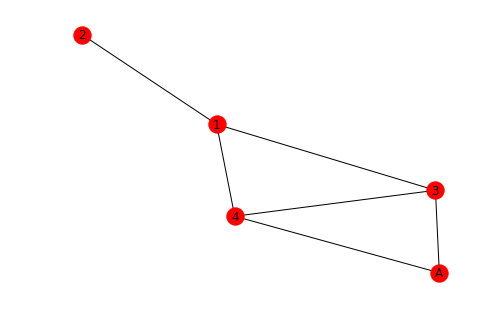

In [18]:
np.random.seed(2011) #fix the origin of random generator - see below why
#now let's visualize, which turns out to be fairly simple with networkx
nx.draw(G,with_labels=True)

note that the locations are selected by random - this is why we fixed random generator to make sure appearance is always the same. But what if we have the locations of the nodes we want the python to stick to?

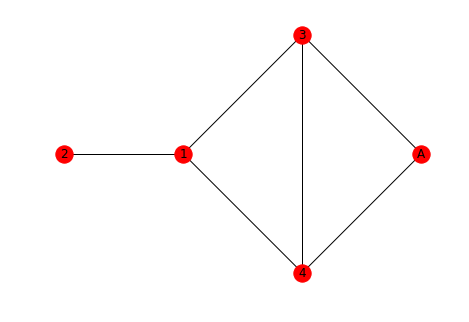

In [19]:
#set up the location for our nodes
pos={1:(50,50),2:(25,50),3:(75,75),4:(75,25),'A':(100,50)}
#visualize for fixed node locations
nx.draw(G,pos=pos,with_labels=True)

But networkx does not only allow to store and visualize the networks. It can also perform a lot of useful computations for us, including some network properties. Let's do node degrees for example

In [45]:
G.degree()

DegreeView({'A': 2, 1: 3, 2: 1, 3: 3, 4: 3})

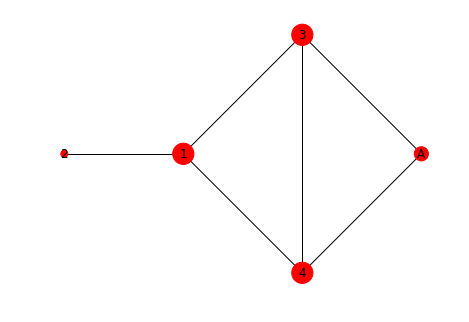

In [46]:
#let's now use node degrees as sizes of the nodes visualized
nx.draw(G,pos=pos,node_size=50*np.array(dict(G.degree()).values())**2,with_labels=True)

networkx can also handle directed networks as well

In [47]:
G2=nx.DiGraph() #create a directed graph
#add same edges as before; notice that when we add edges nodes are added automatically
G2.add_edges_from([(1,2),(1,3),(1,4),(3,4),(4,3),('A',3),('A',4)]) 

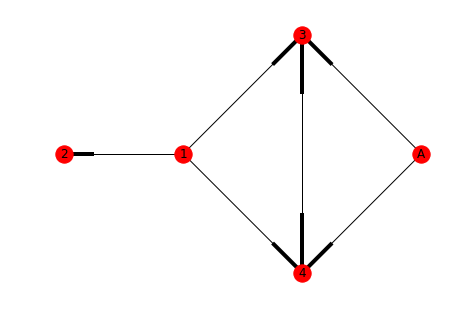

In [48]:
#visualize the network showing directions
nx.draw(G2,pos=pos,with_labels=True,arrows=True)

In [49]:
#calculate incoming and outgoing degrees
print(G2.in_degree())
print(G2.out_degree())

[('A', 0), (1, 0), (2, 1), (3, 3), (4, 3)]
[('A', 2), (1, 3), (2, 0), (3, 1), (4, 1)]


we can also handle a weighted network

In [50]:
G3=nx.DiGraph() #create a directed graph
#add same edges as before but with weights
G3.add_weighted_edges_from([(1,2,2),(1,3,2),(1,4,2),(3,4,1),('A',3,3),('A',4,3)])
#we can also add separate edges in the following way
G3.add_edge('A',1,weight=5)

In [51]:
#we can access all the edges outgoing from a node 'A' like
print(G3['A'])
#a specific edge like
G3['A'][1]['weight']=3
G3['A'][1]['distance']=3
print(G3['A'][1])
#and modify its properties like

{1: {'weight': 5}, 3: {'weight': 3}, 4: {'weight': 3}}
{'distance': 3, 'weight': 3}


In [52]:
G3.edges(data=False)

OutEdgeView([('A', 1), ('A', 3), ('A', 4), (1, 2), (1, 3), (1, 4), (3, 4)])

In [53]:
#now let's extract all the edge weights into a list (in the same order as edges go)
w=[d['weight'] for (u,v,d) in G3.edges(data=True)]
print(w)

[3, 3, 3, 2, 2, 2, 1]


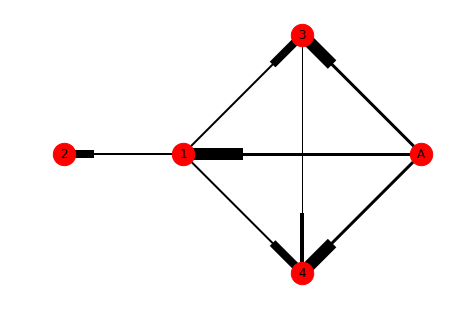

In [54]:
#and visualize the network using edge weights for the edge thikness
nx.draw(G3,pos=pos,with_labels=True,arrows=True,width=3*w,node_size=500)

#### In-class assignment
Visualize the star-like network with 6 nodes located around the circle and one in the center, being connected with the other 6 (all links directed from the center to the outer nodes). Center node should be marked as "C", while others - 1,2,3,4,5,6.

## Network of air connections

Now we'll visualize a real-world network of the world airports with direct air connections. File citiesTable.csv is the table of airports together with their lat-long coordinates, while citiesToCities.csv contains the connection data

In [55]:
import numpy as np
import pandas as pd

In [56]:
cities = pd.read_csv( 'data/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [57]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [58]:
#create a dictionary of city locations
CityPos={}
for c in cities.index:
    CityPos[c]=(cities['long. most active airport'][c],cities['lat. most active airport'][c])

In [59]:
CityPos

{'Deauville': (0.25700000000000001, 49.608000000000004),
 'Yibin': (104.90700000000001, 29.333000000000002),
 'Lianyungang': (119.416, 34.915999999999997),
 'Castlegar': (-117.38799999999999, 49.493000000000002),
 'BRISTOL': (-82.012999999999991, 36.792000000000002),
 'Toledo': (-83.680000000000007, 41.978000000000002),
 'Norman Wells': (-126.664, 65.468999999999994),
 'Dammam': (50.328999999999994, 26.785),
 'Paamiut': (-49.438000000000002, 62.652999999999999),
 'Livingstone': (26.370999999999999, -17.702999999999999),
 'Lanai': (-156.91999999999999, 21.309000000000001),
 'Mitu': (-69.72399999999999, 1.4219999999999999),
 'Bar Harbor': (-67.936000000000007, 44.748999999999995),
 'Niamey': (2.306, 13.802),
 'Kittila': (25.410999999999998, 68.168000000000006),
 'Edmonton': (-113.3, 53.516000000000005),
 'Caen': (-0.084000000000000005, 49.288000000000004),
 'Tan Tan': (-10.603, 28.745999999999999),
 'Alamosa': (-105.77799999999999, 37.725000000000001),
 'Waterloo': (-92.001000000000005, 

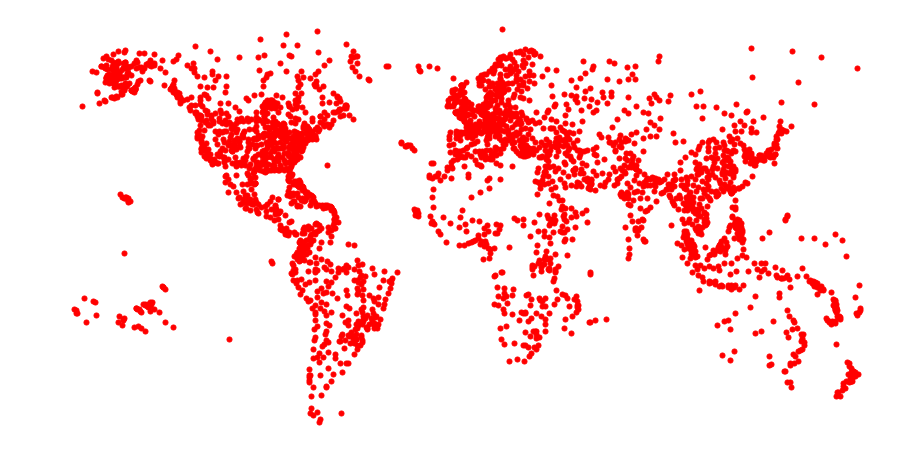

In [60]:
#visualize all the world airport cities
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,node_size=25)

In [61]:
#now read the links
links = pd.read_csv( 'data/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [62]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[0]*EN
for j in range(0,EN):
    edgelist[j]=(links['departure city'][j],links['arrival city'][j])
edgelist

[('Sao Paulo', 'Rio De Janeiro'),
 ('Rio De Janeiro', 'Sao Paulo'),
 ('Beijing', 'Shanghai'),
 ('Johannesburg', 'Cape Town'),
 ('Honolulu', 'Tokyo'),
 ('Tokyo', 'Honolulu'),
 ('Tokyo', 'Seoul'),
 ('Seoul', 'Tokyo'),
 ('Tokyo', 'Los Angeles'),
 ('Los Angeles', 'Tokyo'),
 ('Shanghai', 'Beijing'),
 ('Hong Kong', 'Bangkok'),
 ('Bangkok', 'Hong Kong'),
 ('Taipei', 'Shanghai'),
 ('Shanghai', 'Taipei'),
 ('Cape Town', 'Johannesburg'),
 ('Kigali', 'Entebbe'),
 ('Shanghai', 'Hong Kong'),
 ('Hong Kong', 'Shanghai'),
 ('Muscat', 'Abu Dhabi'),
 ('New York', 'London'),
 ('Abu Dhabi', 'Muscat'),
 ('Shenzhen', 'Shanghai'),
 ('Shanghai', 'Shenzhen'),
 ('Taipei', 'Tokyo'),
 ('Tokyo', 'Taipei'),
 ('Sao Paulo', 'Belo Horizonte'),
 ('New York', 'Washington'),
 ('Washington', 'New York'),
 ('Qingdao', 'Shanghai'),
 ('Shanghai', 'Qingdao'),
 ('Shanghai', 'Chongqing'),
 ('Chongqing', 'Shanghai'),
 ('Singapore', 'Jakarta'),
 ('Jakarta', 'Singapore'),
 ('Sydney', 'Melbourne'),
 ('Beijing', 'Tokyo'),
 ('Tokyo',

In [63]:
#add edges to the network
Flights.add_edges_from(edgelist)

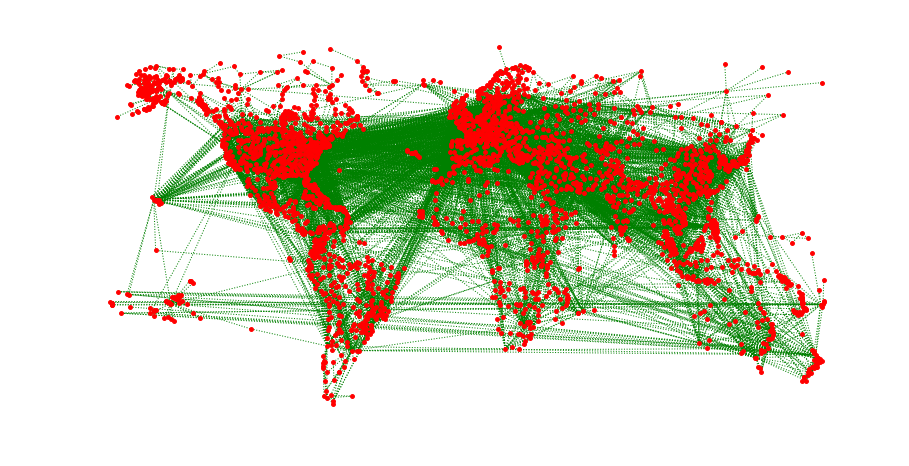

In [64]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Flights,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [68]:
#most connected airport
d=dict(Flights.degree()).values()
j=np.argmax(d)
print('Most connected airport is {0} with {1} connections'.format(dict(Flights.degree()).keys()[j],d[j]))

Most connected airport is London with 311 connections


In [69]:
len(d)

2988

In [71]:
#least connected airport
j=np.argmin(d)
print('Least connected airport is {0} with {1} connections'.format(dict(Flights.degree()).keys()[j],d[j]))

Least connected airport is Bar Harbor with 1 connections


In [72]:
#compute network average number of connections per airport and network density
k_avg=mean(d)
dens=k_avg/(len(d)-1)
print('Average number of connections per airport is {0}; network density ={1}'.format(k_avg,dens))

Average number of connections per airport is 10.4738955823; network density =0.00350649333188


Excercise. Visualize top 20 most connected airports accross the world